In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import time
from sklearn.metrics import r2_score

In [ ]:
!pip install streamlit
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from bs4 import BeautifulSoup
import requests
import urllib.request
import time
#Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier
import streamlit as st
import seaborn as sns
import time
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from bs4 import BeautifulSoup
import requests
import urllib.request
import time
#Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier
import streamlit as st
import seaborn as sns
import time
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Implememtaion with BuzzFeed Dataset

In [ ]:
Df_BuzzFeed_fake= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/BuzzFeed_fake.csv",encoding= 'unicode_escape')

In [ ]:
Df_BuzzFeed_real=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/BuzzFeed_real.csv",encoding= 'unicode_escape')

In [ ]:
Df_BuzzFeed_real.shape

(91, 12)

In [ ]:
Df_BuzzFeed_fake.shape

(91, 12)

In [ ]:
df=pd.concat([Df_BuzzFeed_real,Df_BuzzFeed_fake],axis=0)

In [ ]:
df.shape

(182, 12)

In [ ]:
df['news_type']=df['id'].apply(lambda x: x.split('_')[0])

In [ ]:
df.head(10)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYCâ¦Why Are we S...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""“We believe at this point in ..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."
2,Real_11-Webpage,"Obama To UN: âGiving Up Liberty, Enhances Se...","Obama To UN: âGiving Up Liberty, Enhances Se...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b..."
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws/2dh2NFs,http://a.abcnews.com/images/US/AP_Obama_BM_201...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/president-obama...,"{""fb_title"": ""President Obama Vetoes 9/11 Vict..."
5,Real_14-Webpage,CHAOS! NC Protest MOB Ambushes Female Truck Dr...,CHAOS! NC Protest MOB Ambushes Female Truck Dr...,http://rightwingnews.com/black-lives-matter/ch...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474473199000},https://www.youtube.com/embed/7LUv7x5bXV4,http://rightwingnews.com/wp-content/uploads/wo...,http://rightwingnews.com/black-lives-matter/ch...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
6,Real_15-Webpage,10 Moments That Mattered From Hillary Clinton ...,Hillary Clinton and Donald Trump ushered the 2...,http://abcn.ws/2d56mMD,http://a.abcnews.com/images/Politics/GTY_Debat...,"More Veronica,Ryan Struyk,More Ryan,Meghan Ken...",http://abcn.ws,NaN,NaN,http://a.abcnews.com/images/Politics/gty_debat...,http://abcnews.go.com/Politics/presidential-de...,"{""fb_title"": ""10 Moments That Mattered in 1st ..."
7,Real_16-Webpage,Young Girl's Emotional Council Speech Laments ...,Peaceful protesters crowded Charlotte's first ...,http://abcn.ws/2cTj7ap,http://a.abcnews.com/images/US/AP_Charlotte_Po...,"More Michael,Abc News",http://abcn.ws,NaN,NaN,http://a.abcnews.com/images/US/AP_Charlotte_Po...,http://abcnews.go.com/US/young-girls-emotional...,"{""fb_title"": ""Young Girl's Emotional Speech La..."
8,Real_17-Webpage,Jeb Bush to lecture at Harvard this fall,Story highlights Bush will deliver his first l...,http://cnn.it/2d7qa20,http://i2.cdn.cnn.com/cnnnext/dam/assets/16021...,Ashley Killough,http://cnn.it,NaN,NaN,http://i2.cdn.cnn.com/cnnnext/dam/assets/16042...,http://www.cnn.com/2016/09/27/politics/jeb-bus...,"{""description"": ""Jeb Bush will be a guest lect..."
9,Real_18-Webp

In [ ]:
df.shape

(182, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 90
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              182 non-null    object
 1   title           182 non-null    object
 2   text            182 non-null    object
 3   url             174 non-null    object
 4   top_img         172 non-null    object
 5   authors         141 non-null    object
 6   source          174 non-null    object
 7   publish_date    133 non-null    object
 8   movies          25 non-null     object
 9   images          172 non-null    object
 10  canonical_link  170 non-null    object
 11  meta_data       182 non-null    object
 12  news_type       182 non-null    object
dtypes: object(13)
memory usage: 19.9+ KB


In [ ]:
df.describe()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,news_type
count,182,182,182,174,172,141,174,133,25,172,170,182,182
unique,182,178,178,171,166,90,28,118,25,169,168,171,2
top,Real_1-Webpage,CNNâs Post-Debate Rigged Poll Bustedâ¦Here ...,Weâre shocked â SHOCKED â to learn that ...,http://eaglerising.com/36847/clinton-foundatio...,http://static.politico.com/da/f5/44342c424c68b...,Terresa Monroe-hamilton,http://politi.co,{'$date': 1474588800000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://static.politico.com/da/f5/44342c424c68b...,http://eaglerising.com/36847/clinton-foundatio...,{},Real
freq,1,2,2,2,3,8,32,5,1,2,2,8,91


#Data Cleaning and Feature Engineering

#We select variables of our interest only for analysis, including title, text, source, movies, images and news_type, and remove other columns.

In [ ]:
df.drop(['id','url', 'top_img','authors','publish_date','canonical_link','meta_data'],axis=1, inplace=True)

#We will create a Series that displays the total count of missing values per column.

In [ ]:
df.isnull().sum()

title          0
text           0
source         8
movies       157
images        10
news_type      0
dtype: int64

#We will convert this Series to be in term of percentage of the total DataFrame.

In [ ]:
(df.isnull().sum())/(df.shape[0])*100

title         0.000000
text          0.000000
source        4.395604
movies       86.263736
images        5.494505
news_type     0.000000
dtype: float64

#The datset does not contain null values in text and news_type columns which are the most important columns for us. We leave the null values in the source column as is. However, we add a new columns to the data frame which show whether the news are accompanied by movies and/or images or not.

In [ ]:
df['contain_movies']=df['movies'].apply(lambda x: 0 if str(x)=='nan' else 1)

In [ ]:
df['contain_images']=df['images'].apply(lambda x: 0 if str(x)=='nan' else 1)

In [ ]:
df.drop(['contain_movies','contain_images'],axis=1,inplace=True)

In [ ]:
df.head(1000)

,title,text,source,news_type
0,Another Terrorist Attack in NYCâ¦Why Are we S...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,Real
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,Real
2,"Obama To UN: âGiving Up Liberty, Enhances Se...","Obama To UN: âGiving Up Liberty, Enhances Se...",http://rightwingnews.com,Real
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co,Real
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws,Real
...,...,...,...,...
86,Hillaryâs TOP Donor Country Just Auctioned O...,Hillaryâs TOP Donor Country Just Auctioned O...,http://rightwingnews.com,Fake
87,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,http://conservativetribune.com,Fake
88,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THATâS Weird. If the Birther movement i...,http://clashdaily.com,Fake
89,People Noticed Something Odd About Hillary's O...,\n\nThereâs a lot to be discussed about last...,http://www.thepoliticalinsider.com,Fake


#EDA
#Real Versus Fake News Source Analysis

#Sources of Publising Real News

In [ ]:
real_order=df[df['news_type']=='Real']['source'].value_counts().sort_values(ascending=False).index

<ipython-input-25-62ae47f72381>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='source', data=df[df['news_type']=='Real'],order=real_order,palette='CMRmap')


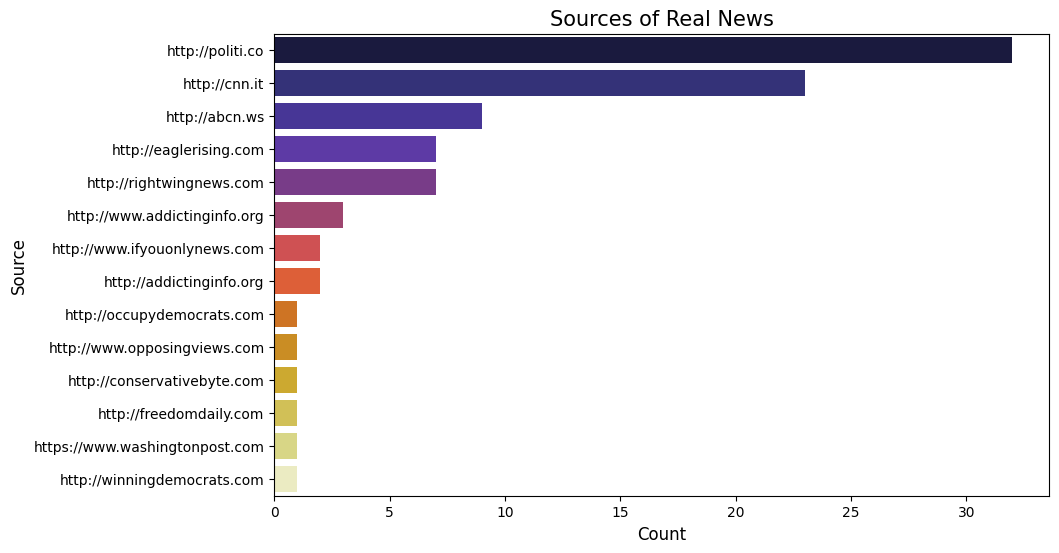

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='source', data=df[df['news_type']=='Real'],order=real_order,palette='CMRmap')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Real News',fontsize=15)
plt.show()

#From the above plot we observe that the politi.com reports maximum real news followed by cnn.it with a count of 32 and 23, respectively.

#Sources of Publishing Maximum Fake News

In [ ]:
fake_order=df[df['news_type']=='Fake']['source'].value_counts().sort_values(ascending=False).index

<ipython-input-27-36e9d65bad77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='source',data=df[df['news_type']=='Fake'],order=fake_order,palette='Dark2')


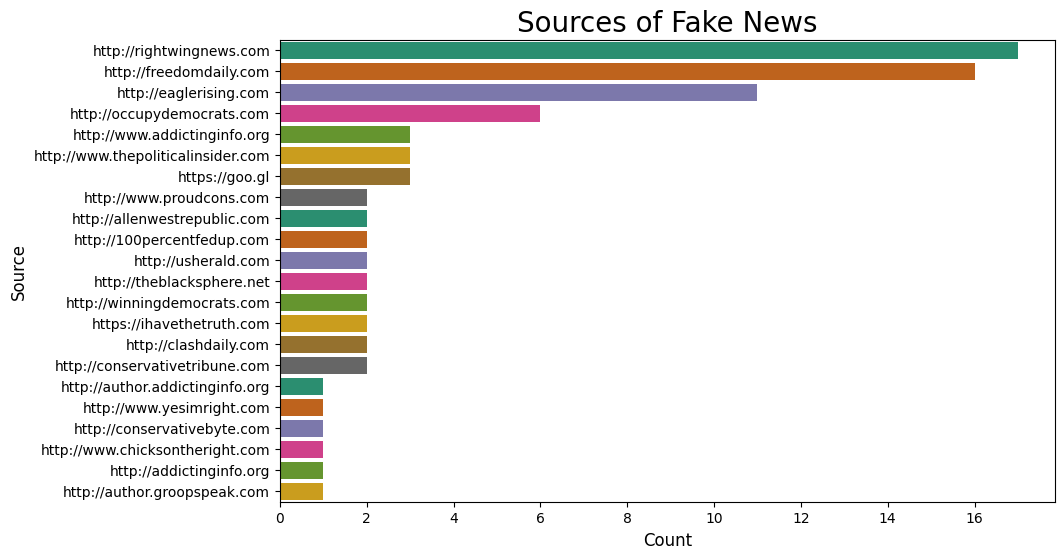

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='source',data=df[df['news_type']=='Fake'],order=fake_order,palette='Dark2')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Fake News',fontsize=20)
plt.show()

#Above plot shows that the rightwingsnews reports maximum fakenews with a count of 17. Also, the number of fake news sources are more than the number of real news sources.

#Common Sources of Publishing Both Real and Fake News

In [ ]:
new=[]
for x in df[df['news_type']=='Fake']['source'].unique():
    if x in df[df['news_type']=='Real']['source'].unique():
        new.append(x)
print(new)

['http://www.addictinginfo.org', 'http://eaglerising.com', 'http://conservativebyte.com', 'http://winningdemocrats.com', 'http://freedomdaily.com', 'http://occupydemocrats.com', 'http://rightwingnews.com', 'http://addictinginfo.org']


In [ ]:
df['common']=df['source'].apply(lambda x: x if x in new else 0)

In [ ]:
df1=df[df['common']!=0]

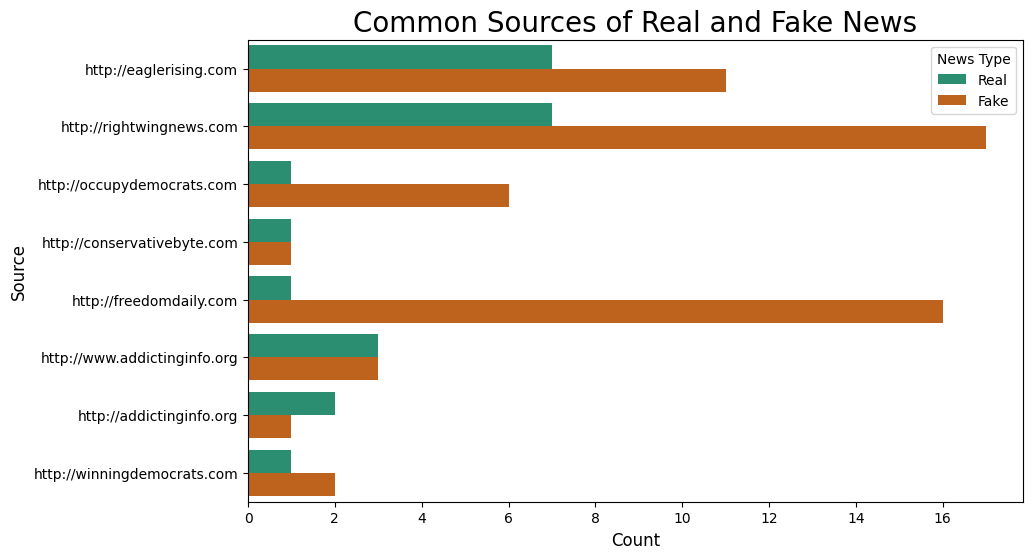

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='common',data=df1,hue='news_type',palette='Dark2')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.legend(loc='best', title='News Type',fontsize=10)
plt.title('Common Sources of Real and Fake News',fontsize=20)
plt.show()

#There are 7 common sources of real and fake news. This is interesting that the fake news are more reported by these sources as compared to real news. The rightwingnews reports maximum fake news but it also reports some real news. Approximaltely, two third of total news reported by rightwings are fake. On the other hand, the freedomdaily which is the second largest fake news reporting source, barely reports the real news. addictinginfo.org is the only single common source which reports real news more than fake news but the total number of the news it reports is very low.

#Analysis of Title and Body of News Articles
#Preprocessing Function¶
#We define a preprocessing function that performs the following operations:
#Converting text to lower case
#Removing numbers from the text corpus
#Removing punctuation from the text corpus
#Removing special characters such as ‘<’, ‘…’ from the text corpus
#Removing english stopwords
#Stemming words to root words
#Removing extra whitespaces from the text corpus

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import WhitespaceTokenizer
from nltk import WordPunctTokenizer
from nltk.corpus import stopwords

In [ ]:
ps=PorterStemmer()
wst= WhitespaceTokenizer()

##### 1. Converting text to lower case
def lower_func (x):
    return x.lower()


##### 2. Removing Numbers from the text corpus
def remove_number_func (x):
    new=""
    for a in x:
        if a.isdigit()==False:
            new=new+a
    return new


##### 3. Removing punctuation
def remove_punc_func(x):
    new=''
    for a in x:
        if a not in string.punctuation:
            new=new+a
    return new

##### 4. Removing special characters
def remove_spec_char_func(x):
    new=''
    for a in x:
        if (a.isalnum()==True) or (a==' '):
            new=new+a
    return(new)

##### 5. Removing english stopwords
def remove_stopwords(x):
    new=[]
    for a in x.split():
        if a not in stopwords.words('english'):
            new.append(a)
    return " ".join(new)

##### 6. Stemming words to root words
def stem_func(x):
    wordlist = word_tokenize(x)
    psstem = [ps.stem(a) for a in wordlist]
    return ' '.join(psstem)

##### 7. Removing extra whitespaces
def remove_whitespace_func(x):
    return(wst.tokenize(x))

def compose(f, g):
    return lambda x: f(g(x))

final=compose(compose(compose(compose(compose(compose(remove_whitespace_func,stem_func),remove_stopwords),remove_spec_char_func),remove_punc_func),remove_number_func),lower_func)

#Fake/Real News Detection Based on News Body
#Splitting Data into Train and Test Datasets

In [ ]:
X1=df['text']
y1=df['news_type']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

#Random Forest Classifier

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [ ]:
pp.fit(X1_train,y1_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x792384f185e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
predictions1=pp.predict(X1_test)

NotFittedError: Vocabulary not fitted or provided

In [ ]:
print(confusion_matrix(y1_test, predictions1))
print('\n')
print(classification_report(y1_test, predictions1))

[[20  6]
 [ 5 24]]


              precision    recall  f1-score   support

        Fake       0.80      0.77      0.78        26
        Real       0.80      0.83      0.81        29

    accuracy                           0.80        55
   macro avg       0.80      0.80      0.80        55
weighted avg       0.80      0.80      0.80        55



#Implemenation Using Gossipcop

In [ ]:
Df_gossipcop_fake= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/gossipcop_fake.csv",encoding= 'unicode_escape')
Df_gossipcop_real=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/gossipcop_real.csv",encoding= 'unicode_escape')

(1999, 4)

In [ ]:
df=pd.concat([Df_gossipcop_real,Df_gossipcop_fake],axis=0)
df.shape

(3998, 4)

In [ ]:
df.head(1000)

NameError: name 'df' is not defined

#Data Cleaning and Feature Engineering
#We select variables of our interest only for analysis, including title, text, source, movies, images and news_type, and remove other columns.

In [ ]:
df.drop(['id','news_url'],axis=1, inplace=True)

#We will create a Series that displays the total count of missing values per column.

In [ ]:
df.isnull().sum()

title    6
type     0
dtype: int64

We will convert this Series to be in term of percentage of the total DataFrame.



In [ ]:
(df.isnull().sum())/(df.shape[0])*100

title    0.150075
type     0.000000
dtype: float64

In [ ]:
dfresult = df.dropna()

#The datset does not contain null values in title and news_type columns which are the most important columns for us.

#Analysis of Title and Body of News Articles
#Preprocessing Function¶
#We define a preprocessing function that performs the following operations:
#Converting text to lower case
#Removing numbers from the text corpus
#Removing punctuation from the text corpus
#Removing special characters such as ‘<’, ‘…’ from the text corpus
#Removing english stopwords
#Stemming words to root words
#Removing extra whitespaces from the text corpus

#Fake/Real News Detection Based on News Body

#Splitting Data into Train and Test Datasets

In [ ]:
X2=dfresult ['title']
y2=dfresult ['type']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

#Random Forest Classifier

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [ ]:
pp.fit(X2_train,y2_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f064807c4c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
predictions2=pp.predict(X2_test)

In [ ]:
print(confusion_matrix(y2_test, predictions2))
print('\n')
print(classification_report(y2_test, predictions2))

[[439 145]
 [154 460]]


              precision    recall  f1-score   support

        fake       0.74      0.75      0.75       584
        real       0.76      0.75      0.75       614

    accuracy                           0.75      1198
   macro avg       0.75      0.75      0.75      1198
weighted avg       0.75      0.75      0.75      1198



#implementation of ISOT dataset

In [ ]:
Df_ISOT_fake= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/Isot_fake1.csv",encoding= 'unicode_escape')
Df_ISOT_real=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/Isot_real2.csv",encoding= 'unicode_escape')

<ipython-input-51-d3fb64b8954c>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  Df_ISOT_fake= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/Isot_fake1.csv",encoding= 'unicode_escape')


In [ ]:
Df_ISOT_fake.shape
Df_ISOT_real.shape

(1999, 5)

In [ ]:
df=pd.concat([Df_ISOT_fake,Df_ISOT_real],axis=0)
df.shape

(25310, 172)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25310 entries, 0 to 1998
Columns: 172 entries, title to Unnamed: 171
dtypes: object(172)
memory usage: 33.4+ MB


In [ ]:
df.head(5)

,title,text,subject,date,type,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
1994,Pentagon notified U.S. Congress of $593 millio...,WASHINGTON (Reuters) - The Pentagon has notifi...,politicsNews,"August 30, 2017",real
1995,Trump rescinds Obama limits on transfer of mil...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 28, 2017",real
1996,Lawmakers should OK relief for Harvey victims:...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"August 28, 2017",real
1997,Energy Secretary Perry cancels Kazakhstan visi...,ALMATY (Reuters) - United States Energy Secret...,politicsNews,"August 28, 2017",real


In [ ]:
dfresult = df.dropna()

In [ ]:
dfresult

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
1994,Pentagon notified U.S. Congress of $593 millio...,WASHINGTON (Reuters) - The Pentagon has notifi...,politicsNews,"August 30, 2017",real
1995,Trump rescinds Obama limits on transfer of mil...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 28, 2017",real
1996,Lawmakers should OK relief for Harvey victims:...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"August 28, 2017",real
1997,Energy Secretary Perry cancels Kazakhstan visi...,ALMATY (Reuters) - United States Energy Secret...,politicsNews,"August 28, 2017",real


In [ ]:
ps=PorterStemmer()
wst= WhitespaceTokenizer()

##### 1. Converting text to lower case
def lower_func (x):
    return x.lower()


##### 2. Removing Numbers from the text corpus
def remove_number_func (x):
    new=""
    for a in x:
        if a.isdigit()==False:
            new=new+a
    return new


##### 3. Removing punctuation
def remove_punc_func(x):
    new=''
    for a in x:
        if a not in string.punctuation:
            new=new+a
    return new

##### 4. Removing special characters
def remove_spec_char_func(x):
    new=''
    for a in x:
        if (a.isalnum()==True) or (a==' '):
            new=new+a
    return(new)

##### 5. Removing english stopwords
def remove_stopwords(x):
    new=[]
    for a in x.split():
        if a not in stopwords.words('english'):
            new.append(a)
    return " ".join(new)

##### 6. Stemming words to root words
def stem_func(x):
    wordlist = word_tokenize(x)
    psstem = [ps.stem(a) for a in wordlist]
    return ' '.join(psstem)

##### 7. Removing extra whitespaces
def remove_whitespace_func(x):
    return(wst.tokenize(x))

def compose(f, g):
    return lambda x: f(g(x))

final=compose(compose(compose(compose(compose(compose(remove_whitespace_func,stem_func),remove_stopwords),remove_spec_char_func),remove_punc_func),remove_number_func),lower_func)

#Fake/Real News Detection Based on News Body
#Splitting Data into Train and Test Datasets

In [ ]:
X3=dfresult['text']
y3=dfresult['type']

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [ ]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f063e8c85e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
predictions1=pp.predict(X1_test)

In [ ]:
print(confusion_matrix(y1_test, predictions1))
print('\n')
print(classification_report(y1_test, predictions1))

[[ 0  0 21  5]
 [ 0  0 19 10]
 [ 0  0  0  0]
 [ 0  0  0  0]]


              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00      26.0
        Real       0.00      0.00      0.00      29.0
        fake       0.00      0.00      0.00       0.0
        real       0.00      0.00      0.00       0.0

    accuracy                           0.00      55.0
   macro avg       0.00      0.00      0.00      55.0
weighted avg       0.00      0.00      0.00      55.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

#implementation of Kaggle dataset

In [ ]:
Df_Kaggle_fake= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/Kaggle_fake1.csv",encoding= 'unicode_escape')
Df_Kaggle_real=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/Kaggle_real1.csv",encoding= 'unicode_escape')

In [ ]:
df6=pd.concat([Df_Kaggle_fake,Df_Kaggle_real],axis=0)
df6.shape

(11085, 5)

#Data Cleaning and Feature Engineering

In [ ]:
dfresult6 = df6.dropna()

In [ ]:
dfresult6

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
1995,Trump rescinds Obama limits on transfer of mil...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 28, 2017",real
1996,Lawmakers should OK relief for Harvey victims:...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"August 28, 2017",real
1997,Energy Secretary Perry cancels Kazakhstan visi...,ALMATY (Reuters) - United States Energy Secret...,politicsNews,"August 28, 2017",real
1998,Trump's firm sought Moscow real estate deal du...,WASHINGTON (Reuters) - Donald Trumpâs compan...,politicsNews,"August 28, 2017",real


In [ ]:
ps=PorterStemmer()
wst= WhitespaceTokenizer()

##### 1. Converting text to lower case
def lower_func (x):
    return x.lower()


##### 2. Removing Numbers from the text corpus
def remove_number_func (x):
    new=""
    for a in x:
        if a.isdigit()==False:
            new=new+a
    return new


##### 3. Removing punctuation
def remove_punc_func(x):
    new=''
    for a in x:
        if a not in string.punctuation:
            new=new+a
    return new

##### 4. Removing special characters
def remove_spec_char_func(x):
    new=''
    for a in x:
        if (a.isalnum()==True) or (a==' '):
            new=new+a
    return(new)

##### 5. Removing english stopwords
def remove_stopwords(x):
    new=[]
    for a in x.split():
        if a not in stopwords.words('english'):
            new.append(a)
    return " ".join(new)

##### 6. Stemming words to root words
def stem_func(x):
    wordlist = word_tokenize(x)
    psstem = [ps.stem(a) for a in wordlist]
    return ' '.join(psstem)

##### 7. Removing extra whitespaces
def remove_whitespace_func(x):
    return(wst.tokenize(x))

def compose(f, g):
    return lambda x: f(g(x))

final=compose(compose(compose(compose(compose(compose(remove_whitespace_func,stem_func),remove_stopwords),remove_spec_char_func),remove_punc_func),remove_number_func),lower_func)

#Fake/Real News Detection Based on News Body
#Splitting Data into Train and Test Datasets

In [ ]:
X6=dfresult6['text']
y6=dfresult6['type']

In [ ]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=42)

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [ ]:
pp.fit(X6_train,y6_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f063a586290>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
predictions6=pp.predict(X6_test)

In [ ]:
print(confusion_matrix(y6_test, predictions6))
print('\n')
print(classification_report(y6_test, predictions6))

[[617   0]
 [  1 582]]


              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       617
        real       1.00      1.00      1.00       583

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



#implementation of Politifact dataset

In [ ]:
Df_politifact_fake= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/politifact_fake1.csv",encoding= 'unicode_escape')
Df_politifact_real=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake_dataset/Existing Dataset/politifact_real1.csv",encoding= 'unicode_escape')

In [ ]:
df5=pd.concat([Df_politifact_fake,Df_politifact_real],axis=0)
df5.shape

(3998, 3)

In [ ]:
df5.isnull().sum()

id       0
title    0
type     0
dtype: int64

#Data Cleaning and Feature Engineering

In [ ]:
dfresult5 = df5.dropna()

In [ ]:
dfresult5

,id,title,type
0,politifact15014,BREAKING: First NFL Team Declares Bankruptcy O...,fake
1,politifact15156,Court Orders Obama To Pay $400 Million In Rest...,fake
2,politifact14745,UPDATE: Second Roy Moore Accuser Works For Mic...,fake
3,politifact14355,Oscar Pistorius Attempts To Commit Suicide,fake
4,politifact15371,Trump Votes For Death Penalty For Being Gay,fake
...,...,...,...
1994,politifact4588,Rick Perry says he switched to GOP at a younge...,real
1995,politifact134,"Hillary Rodham Clinton, Senator for New York: ...",real
1996,politifact11627,Senator Bernie Sanders on Democratic Socialism...,real
1997,politifact12052,"The CNN Miami Republican debate transcript, an...",real


In [ ]:
X5=dfresult5 ['title']
y5=dfresult5 ['type']

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=42)


In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])


In [ ]:
pp.fit(X5_train,y5_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f063a586290>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
predictions5=pp.predict(X5_test)

In [ ]:
print(confusion_matrix(y5_test, predictions5))
print('\n')
print(classification_report(y5_test, predictions5))


[[610   7]
 [  2 581]]


              precision    recall  f1-score   support

        fake       1.00      0.99      0.99       617
        real       0.99      1.00      0.99       583

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [ ]:
# results=pd.DataFrame({'Existing Dataset':['BuzzFeed','gossipcop','Isot','politifact','Kaggle'],
#                     'Score':[80,99,49,76,87]})
# result_df=results.sort_values(by='Accuracy Score', ascending=False)
# result_df=result_df.set_index('Existing Dataset')
# result_df

results=pd.DataFrame({'Existing Dataset':['BuzzFeed','gossipcop','Isot','politifact','Kaggle'],
                    'Accuracy Score':[80,99,49,99,87]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Existing Dataset')
result_df

,Accuracy Score
Existing Dataset,
gossipcop,99
politifact,99
Kaggle,87
BuzzFeed,80
Isot,49


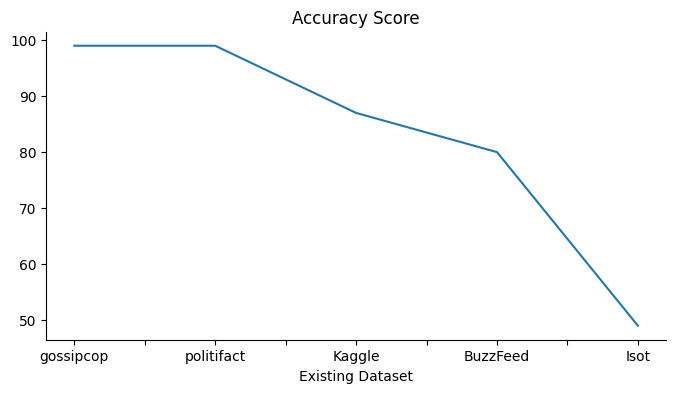

In [ ]:
from matplotlib import pyplot as plt
result_df['Accuracy Score'].plot(kind='line', figsize=(8, 4), title='Accuracy Score')
plt.gca().spines[['top', 'right']].set_visible(False)

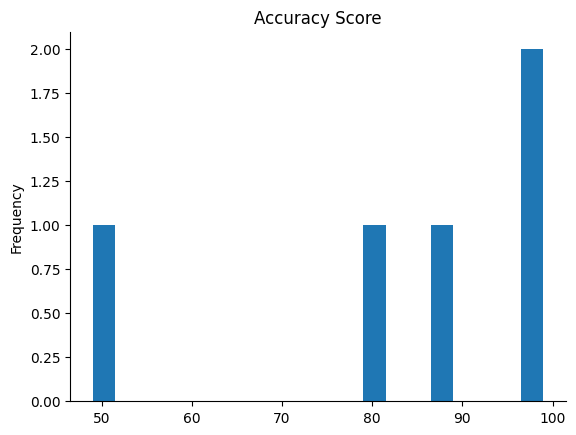

In [ ]:
from matplotlib import pyplot as plt
result_df['Accuracy Score'].plot(kind='hist', bins=20, title='Accuracy Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# results=pd.DataFrame({'Existing Dataset':['BuzzFeed','gossipcop','Isot','politifact','Kaggle'],
#                     'Score':[80,99,49,76,87]})
# result_df=results.sort_values(by='Accuracy Score', ascending=False)
# result_df=result_df.set_index('Existing Dataset')
# result_df
results=pd.DataFrame({'ML Model':['Naive Bayes','SVM','RF'],
                    'Accuracy Score':[66,94,93]})
result_df=results.sort_values(by='Accuracy Score', ascending=True)
result_df=result_df.set_index('ML Model')

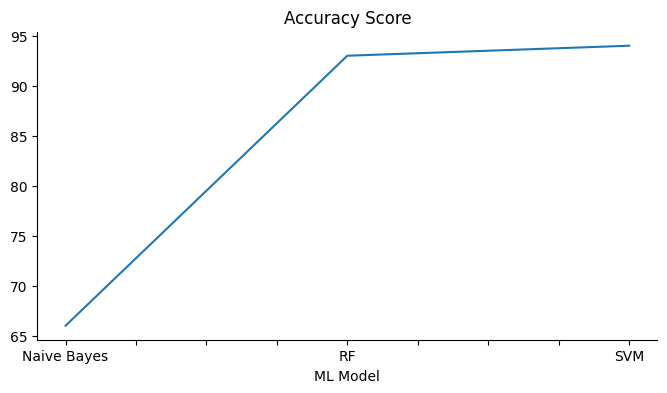

In [ ]:
from matplotlib import pyplot as plt
result_df['Accuracy Score'].plot(kind='line', figsize=(8, 4), title='Accuracy Score')
plt.gca().spines[['top', 'right']].set_visible(False)

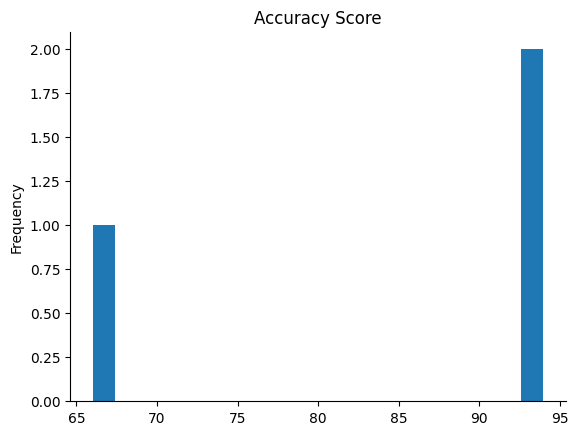

In [ ]:
from matplotlib import pyplot as plt
result_df['Accuracy Score'].plot(kind='hist', bins=20, title='Accuracy Score')
plt.gca().spines[['top', 'right',]].set_visible(False)